# Business Growth Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import datetime

## Import Data Source

In [77]:
data_src = "Raw-Agg Perf Nationwide_Wk 2023021.csv"
cols = ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'TM_KEY_YR', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'AGG_TYPE', 'RR_IND', 'GRY_IND', 'UOM', 'PERIOD', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG', 'PPN_TM']
df = pd.read_csv(data_src, low_memory=False)
# df = df.loc[:, cols]
df = df[cols]

curr_yr = max(df['TM_KEY_YR'])
last_yr = max(df['TM_KEY_YR'])-1
curr_mth = max(df['TM_KEY_MTH'])
last_mth = int(f'{str(last_yr)}01') if str(curr_mth)[4:]=='01' else curr_mth-1
curr_wk = max(df['TM_KEY_WK'])
curr_day = max(df['TM_KEY_DAY'])
last_ppn_tm = max(df['PPN_TM'])

df.head(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_YR,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,...,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
0,20230301,2023009,202303,2023,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,...,N,0,GYR,%,M,NaN,NaN,NaN,NaN,2023-05-30 08:50:36
1,20230302,2023009,202303,2023,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,...,N,0,GYR,%,M,NaN,NaN,NaN,NaN,2023-05-30 08:50:36
2,20230303,2023009,202303,2023,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,...,N,0,GYR,%,M,NaN,NaN,NaN,NaN,2023-05-30 08:50:36


In [78]:
df.shape

(46080, 21)

## Week period

In [4]:
first_wk_day = df.groupby('TM_KEY_WK').agg({'TM_KEY_DAY': 'min'}).reset_index()
last_wk_day = df.groupby('TM_KEY_WK').agg({'TM_KEY_DAY': 'max'}).reset_index()
wk_day_period = pd.merge(first_wk_day, last_wk_day, on='TM_KEY_WK')
wk_day_period.tail()

,TM_KEY_WK,TM_KEY_DAY_x,TM_KEY_DAY_y
9,2023018,20230501,20230507
10,2023019,20230508,20230514
11,2023020,20230515,20230521
12,2023021,20230522,20230528
13,2023022,20230529,20230529


## Preview Data

In [5]:
df_tmp = df[df['CENTER'] == 'Sales & Revenue']
df_tmp.head(3)

# df_tmp.to_excel("temp.xlsx")

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_YR,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,...,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
2520,20230301,2023009,202303,2023,Sales & Revenue,NaN,TRUE,TVS,TB4R000901,Ads/sponsership,...,A,0,GYR,baht,M,NaN,NaN,NaN,NaN,2023-05-30 08:50:36
2521,20230302,2023009,202303,2023,Sales & Revenue,NaN,TRUE,TVS,TB4R000901,Ads/sponsership,...,A,0,GYR,baht,M,NaN,NaN,NaN,NaN,2023-05-30 08:50:36
2522,20230303,2023009,202303,2023,Sales & Revenue,NaN,TRUE,TVS,TB4R000901,Ads/sponsership,...,A,0,GYR,baht,M,NaN,NaN,NaN,NaN,2023-05-30 08:50:36


In [ ]:
df_tmp['AGG_TYPE'].unique()
df_tmp.groupby('AGG_TYPE').size()
# df_tmp.shape

In [ ]:
df_agg_n = df_tmp[df_tmp['AGG_TYPE']=='N'].sort_values('TM_KEY_DAY')
df_agg_n.head(3)
# df_agg_n['METRIC_NAME'].unique()

In [ ]:
df_agg_s = df_tmp[df_tmp['AGG_TYPE']=='S'].sort_values('TM_KEY_DAY')
df_agg_s.head(3)
# df_agg_s['METRIC_NAME'].unique()

In [ ]:
df_tmp_agg = df_tmp.groupby(['METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_AS_OF': 'max', 'ACTUAL_SNAP': 'sum', 'PPN_TM': 'max'}).reset_index()
df_tmp_agg.head()
# df_tmp_agg.tail()

In [ ]:
# df_tmp_agg = df_tmp[df_tmp['METRIC_NAME'] == 'Postpaid Activation Subs B2B : TMH']
df_tmp_agg = df_tmp[df_tmp['TM_KEY_MTH'] == 202305].loc[:, ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'PPN_TM']]
df_tmp_agg.tail()
# df_tmp_agg

In [ ]:
# df_tmp['ACTUAL_SNAP'].notnull()
# df_tmp.notnull()
df_tmp['DAY_ACT_SNAP'] = np.where(df_tmp['ACTUAL_SNAP'].notnull(), df_tmp['TM_KEY_DAY'], 0)
df_tmp['x'] = np.where(df_tmp['ACTUAL_SNAP'].notnull(), 1, 0)
df_tmp['x2'] = df_tmp['ACTUAL_SNAP'].apply(lambda x: 1 if x >= 0 else 0)
# df_tmp['x3'] = df_tmp.apply(lambda x: 1 if x['ACTUAL_SNAP'].notnull() else 0, axis=1)

# df['Final_fee'] = df.apply(lambda x: x['Fee'] - x['Discount'], axis=1)
# df[new_columns_name] = df[column_A].apply(lambda x: 1 if x >= 0 else 0)
df_tmp.tail()

## BG Revenue Data

In [6]:
# bg_cd_list = ['B1R000100', 'B2R000100', 'TB3R000100', 'TB4R000100', 'TNSC00142'] # include "TDG Revenue (Performance View)"
bg_rev_cd_list = ['B1R000100', 'B2R000100', 'TB3R000100', 'TB4R000100']
df_rev = df[df['METRIC_CD'].isin(bg_rev_cd_list)]
df_rev.head(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_YR,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,...,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
20520,20230301,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,1.376380e+07,1.376380e+07,6.416632e+06,6.416632e+06,2023-05-30 08:50:36
20521,20230302,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,8.521882e+08,8.659520e+08,8.645637e+08,8.709803e+08,2023-05-30 08:50:36
20522,20230303,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,9.943611e+07,9.653881e+08,9.872504e+07,9.697053e+08,2023-05-30 08:50:36


In [7]:
df_rev.shape

(360, 21)

## Visualization
##### https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [9]:
# BG Revenue Rawdata
# df_rev_agg = pd.DataFrame(df_rev.groupby(['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_SNAP': 'sum', 'TARGET_SNAP': 'sum'}).reset_index())
df_rev_agg = df_rev.loc[:, ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG']]
df_rev_agg['ACTUAL_SNAP'] = df_rev_agg['ACTUAL_SNAP'] / 1000000
df_rev_agg['TARGET_SNAP'] = df_rev_agg['TARGET_SNAP'] / 1000000

# df_rev_agg.to_excel('temp.xlsx')
df_rev_agg.head(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,METRIC_CD,METRIC_NAME,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG
20520,20230301,2023009,202303,B2R000100,Postpaid Revenue,13.763796,1.376380e+07,6.416632,6.416632e+06
20521,20230302,2023009,202303,B2R000100,Postpaid Revenue,852.188211,8.659520e+08,864.563665,8.709803e+08
20522,20230303,2023009,202303,B2R000100,Postpaid Revenue,99.436112,9.653881e+08,98.725042,9.697053e+08


In [10]:
df_rev_agg.shape

(360, 9)

## Monthly Performance

In [147]:
# Rawdata by month
df_rev_mth = df_rev_agg.groupby('TM_KEY_MTH').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_mth['%ACHIEVE'] = (df_rev_mth['ACTUAL_SNAP'] / df_rev_mth['TARGET_SNAP']) * 100
df_rev_mth['ACTUAL_DIFF'] = df_rev_mth['ACTUAL_SNAP'].diff()
df_rev_mth['LAST_MTH_ACTUAL'] = df_rev_mth['ACTUAL_SNAP'] - df_rev_mth['ACTUAL_DIFF']

# Aggregation
x = df_rev_mth['TM_KEY_MTH'].apply(str).str[4:]
x_axis = np.arange(len(x))
y_act = df_rev_mth['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_mth['TARGET_SNAP'].round(2)
y_ach = df_rev_mth['%ACHIEVE'].round(2)
y_diff = df_rev_mth['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_mth['LAST_MTH_ACTUAL'].round(2)

# df_rev_mth

C:\Users\Narut4\AppData\Local\Temp\ipykernel_23504\4201973600.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_mth = df_rev_agg.groupby('TM_KEY_MTH').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()


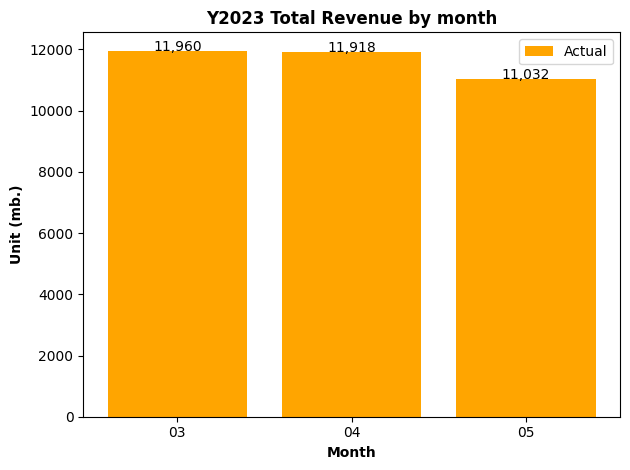

In [148]:
# plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')    
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by month', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

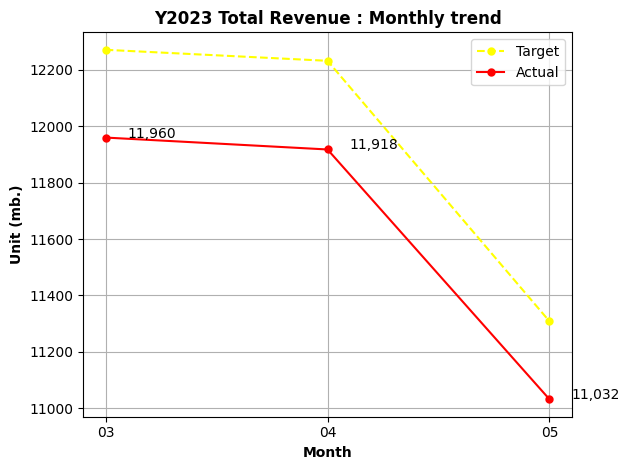

In [151]:
# plt.figure().set_figwidth(12)

# plt.plot(x_axis, y_tgt, 'bo--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_tgt, marker='.', linestyle='dashed', markeredgewidth=3, label='Target', color='yellow')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))
    # plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i]+0.1, y_tgt[i]))
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Monthly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

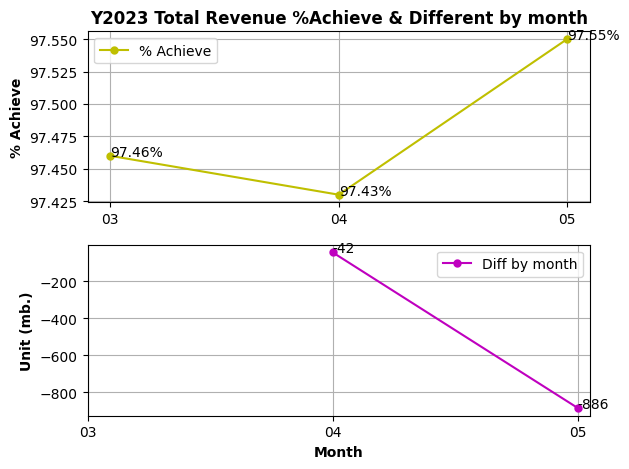

In [152]:
# plt.figure().set_figwidth(12)

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i], y_ach[i]))
plt.xticks(x_axis, x)
plt.title(f'Y{curr_yr} Total Revenue %Achieve & Different by month', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by month', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i], y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Weekly Performance

In [153]:
# Rawdata by week
df_rev_wk = df_rev_agg.groupby('TM_KEY_WK').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_wk['%ACHIEVE'] = (df_rev_wk['ACTUAL_SNAP'] / df_rev_wk['TARGET_SNAP']) * 100
df_rev_wk['ACTUAL_DIFF'] = df_rev_wk['ACTUAL_SNAP'].diff().fillna(0)
df_rev_wk['LAST_WK_ACTUAL'] = df_rev_wk['ACTUAL_SNAP'] - df_rev_wk['ACTUAL_DIFF']
# df_rev_wk['FF_NULL_TEST'] = df_rev_wk['ACTUAL_DIFF'].fillna(0)

# Aggregation
x = df_rev_wk['TM_KEY_WK'].apply(str).str[5:]
x_axis = np.arange(len(x))
y_act = df_rev_wk['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_wk['TARGET_SNAP'].round(2)
y_ach = df_rev_wk['%ACHIEVE'].round(2)
y_diff = df_rev_wk['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_wk['LAST_WK_ACTUAL'].round(2)

# df_rev_wk.tail()

C:\Users\Narut4\AppData\Local\Temp\ipykernel_23504\2477799141.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_wk = df_rev_agg.groupby('TM_KEY_WK').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()


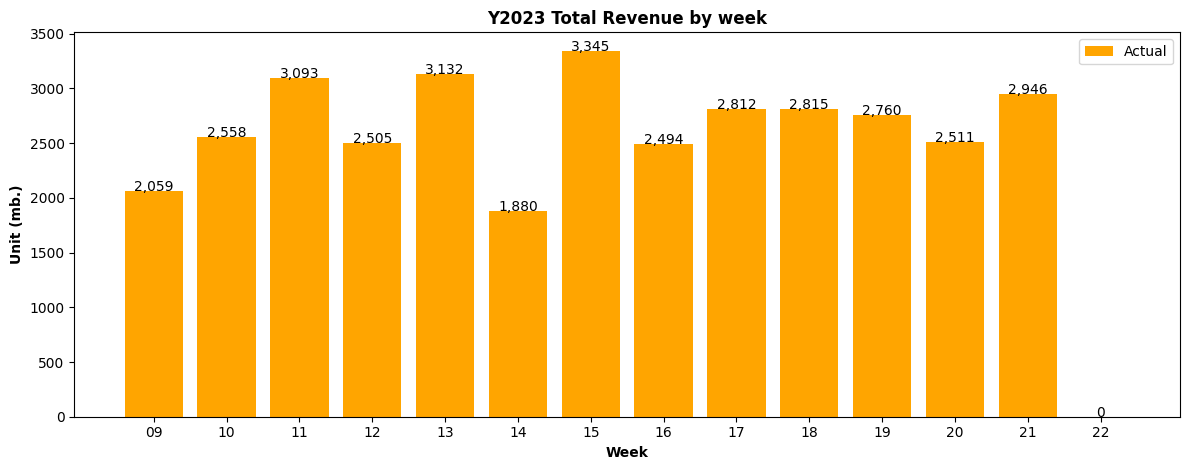

In [154]:
plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by week', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

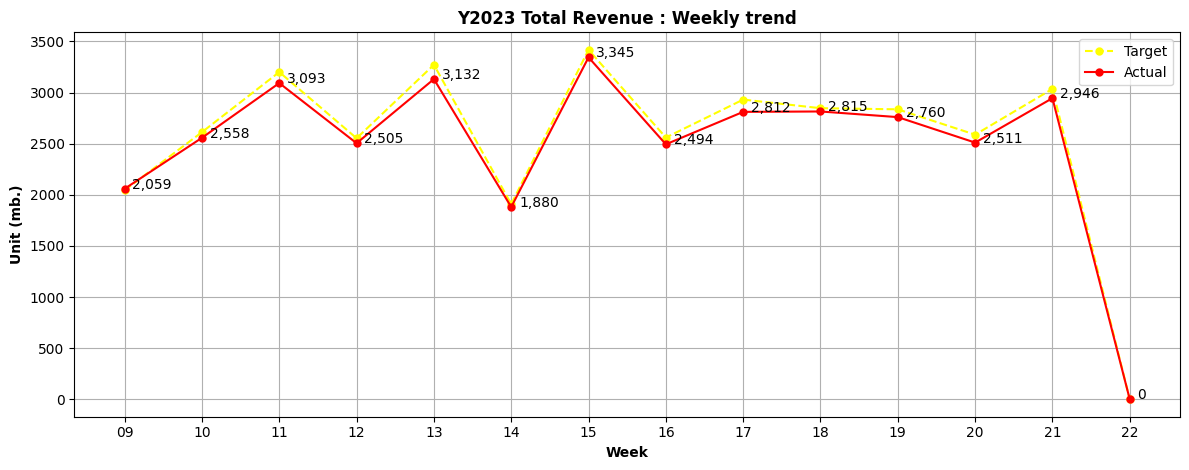

In [156]:
plt.figure().set_figwidth(12)

plt.plot(x_axis, y_tgt, marker='.', linestyle='dashed', markeredgewidth=3, label='Target', color='yellow')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))
    # plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i]+0.1, y_tgt[i]))
    
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Weekly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

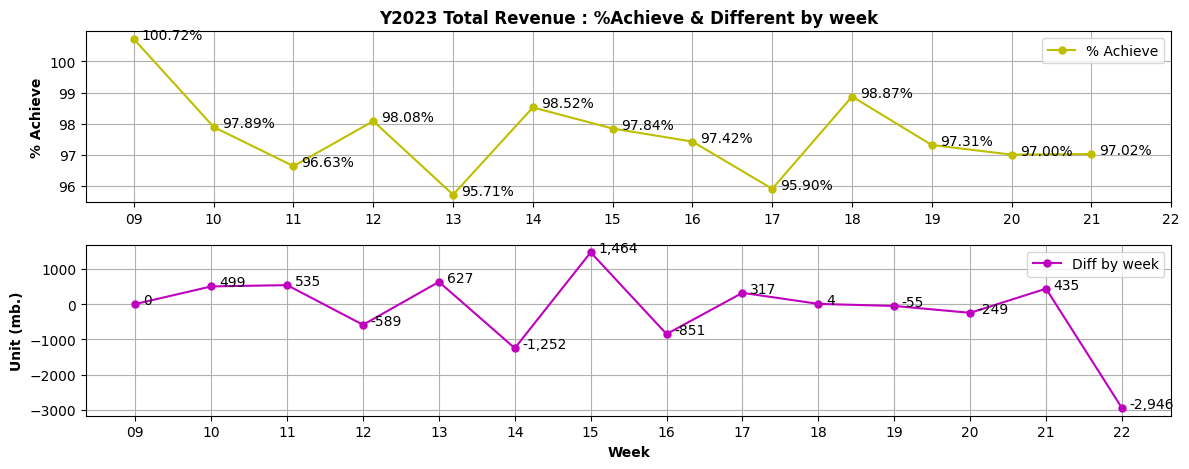

In [158]:
plt.figure().set_figwidth(12)

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i]+0.1, y_ach[i]))
plt.xticks(x_axis, x)
plt.title(f'Y{curr_yr} Total Revenue : %Achieve & Different by week', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by week', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i]+0.1, y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Daily Performance : M2D

In [159]:
# Rawdata by day
df_rev_curr_mth = df_rev_agg[df_rev_agg['TM_KEY_MTH']==curr_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_curr_mth['KEY_DAY'] = df_rev_curr_mth['TM_KEY_DAY'].apply(str).str[6:]

df_rev_last_mth = df_rev_agg[df_rev_agg['TM_KEY_MTH']==last_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_last_mth['KEY_DAY'] = df_rev_last_mth['TM_KEY_DAY'].apply(str).str[6:]
df_rev_last_mth.rename(columns=({'TM_KEY_DAY': 'LAST_MTH_TM_KEY_DAY', 'ACTUAL_SNAP': 'LAST_MTH_ACTUAL', 'TARGET_SNAP': 'LAST_MTH_TARGET'}), inplace=True)

df_rev_day = pd.merge(df_rev_curr_mth, df_rev_last_mth, on='KEY_DAY')
df_rev_day['%ACHIEVE'] = (df_rev_day['ACTUAL_SNAP'] / df_rev_day['TARGET_SNAP']) * 100
df_rev_day['ACTUAL_DIFF'] = df_rev_day['ACTUAL_SNAP'].diff().fillna(0)
df_rev_day['LAST_DAY_ACTUAL'] = df_rev_day['ACTUAL_SNAP'] - df_rev_day['ACTUAL_DIFF']
# df_rev_day['FF_NULL_TEST'] = df_rev_day['ACTUAL_DIFF'].fillna(0)

# Aggregation
# x = df_rev_day['TM_KEY_DAY'].apply(str).str[6:]
x = df_rev_day['KEY_DAY']
x_axis = np.arange(len(x))
y_act = df_rev_day['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_day['TARGET_SNAP'].round(2)
y_ach = df_rev_day['%ACHIEVE'].round(2)
y_diff = df_rev_day['ACTUAL_DIFF'].round(2)
y_last_day_act = df_rev_day['LAST_DAY_ACTUAL'].round(2)
y_last_mth_act = df_rev_day['LAST_MTH_ACTUAL'].round(2)

df_rev_day.tail()

C:\Users\Narut4\AppData\Local\Temp\ipykernel_23504\3245922132.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_curr_mth = df_rev_agg[df_rev_agg['TM_KEY_MTH']==curr_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
C:\Users\Narut4\AppData\Local\Temp\ipykernel_23504\3245922132.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_last_mth = df_rev_agg[df_rev_agg['TM_KEY_MTH']==last_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()


,TM_KEY_DAY,ACTUAL_SNAP,TARGET_SNAP,KEY_DAY,LAST_MTH_TM_KEY_DAY,LAST_MTH_ACTUAL,LAST_MTH_TARGET,%ACHIEVE,ACTUAL_DIFF,LAST_DAY_ACTUAL
24,20230525,741.923734,761.733554,25,20230425,755.447333,762.807816,97.399377,541.270735,200.652999
25,20230526,220.341611,218.283773,26,20230426,215.023588,218.023952,100.942735,-521.582124,741.923734
26,20230527,213.375107,217.481832,27,20230427,215.525227,217.525319,98.111693,-6.966504,220.341611
27,20230528,634.194799,670.226202,28,20230428,809.216658,792.736971,94.623994,420.819692,213.375107
28,20230529,0.000000,0.000000,29,20230429,429.214762,435.403196,NaN,-634.194799,634.194799


In [146]:
df_rev_day.shape

(29, 10)

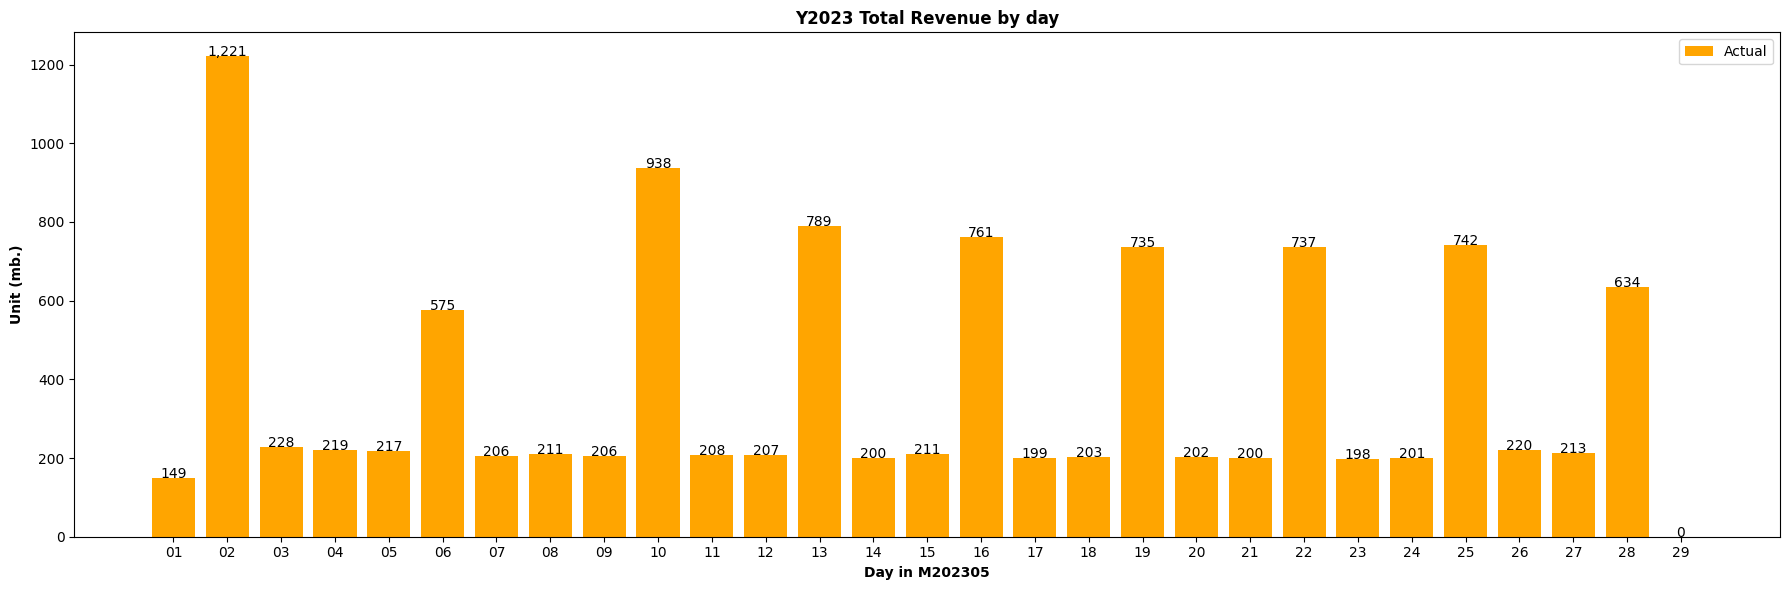

In [160]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
plt.xticks(x_axis, x)
plt.xlabel(f'Day in M{curr_mth}', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by day', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

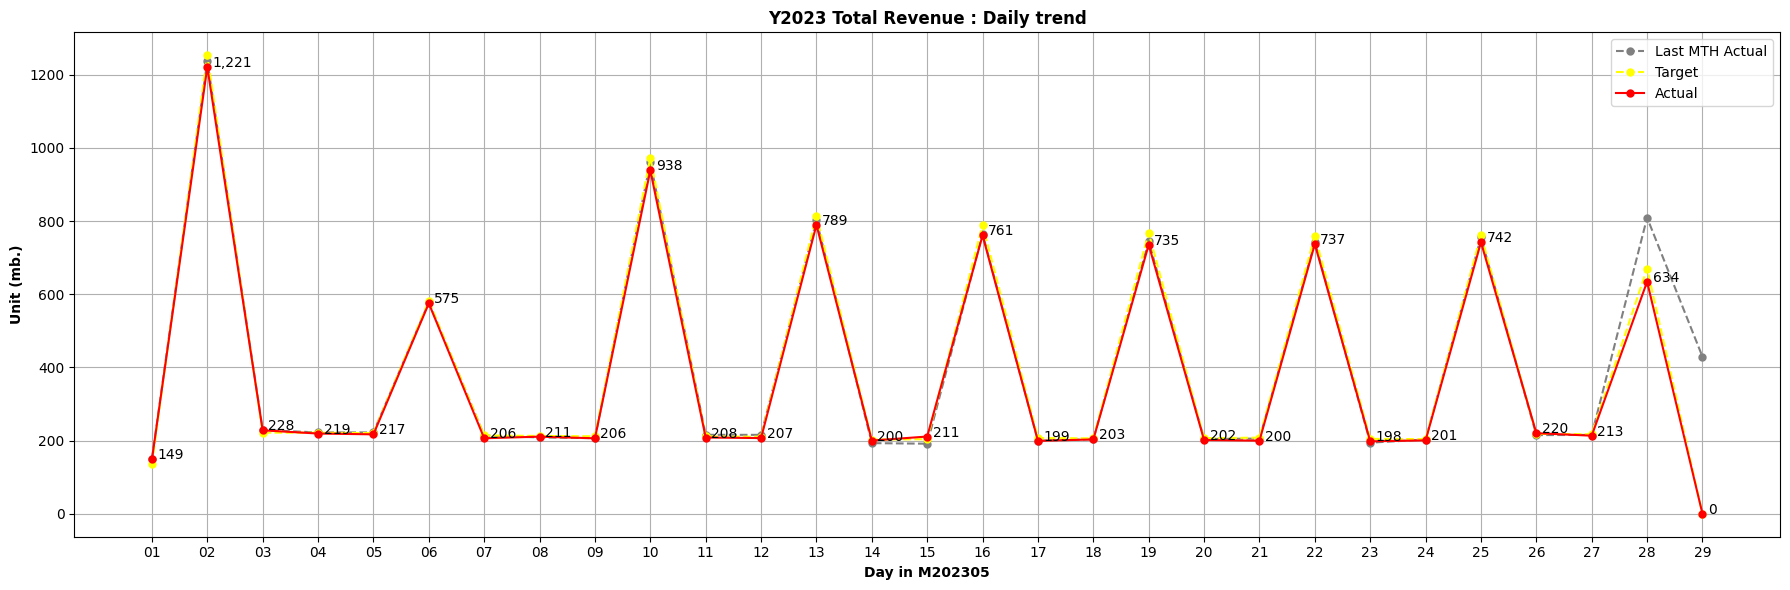

In [161]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

# plt.plot(x_axis, y_tgt, 'bo--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_last_mth_act, marker='.', linestyle='dashed', markeredgewidth=3, label='Last MTH Actual', color='gray')
plt.plot(x_axis, y_tgt, marker='.', linestyle='dashed', markeredgewidth=3, label='Target', color='yellow')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))
    # plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i]+0.1, y_tgt[i]))
plt.xticks(x_axis, x)
plt.xlabel(f'Day in M{curr_mth}', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Daily trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

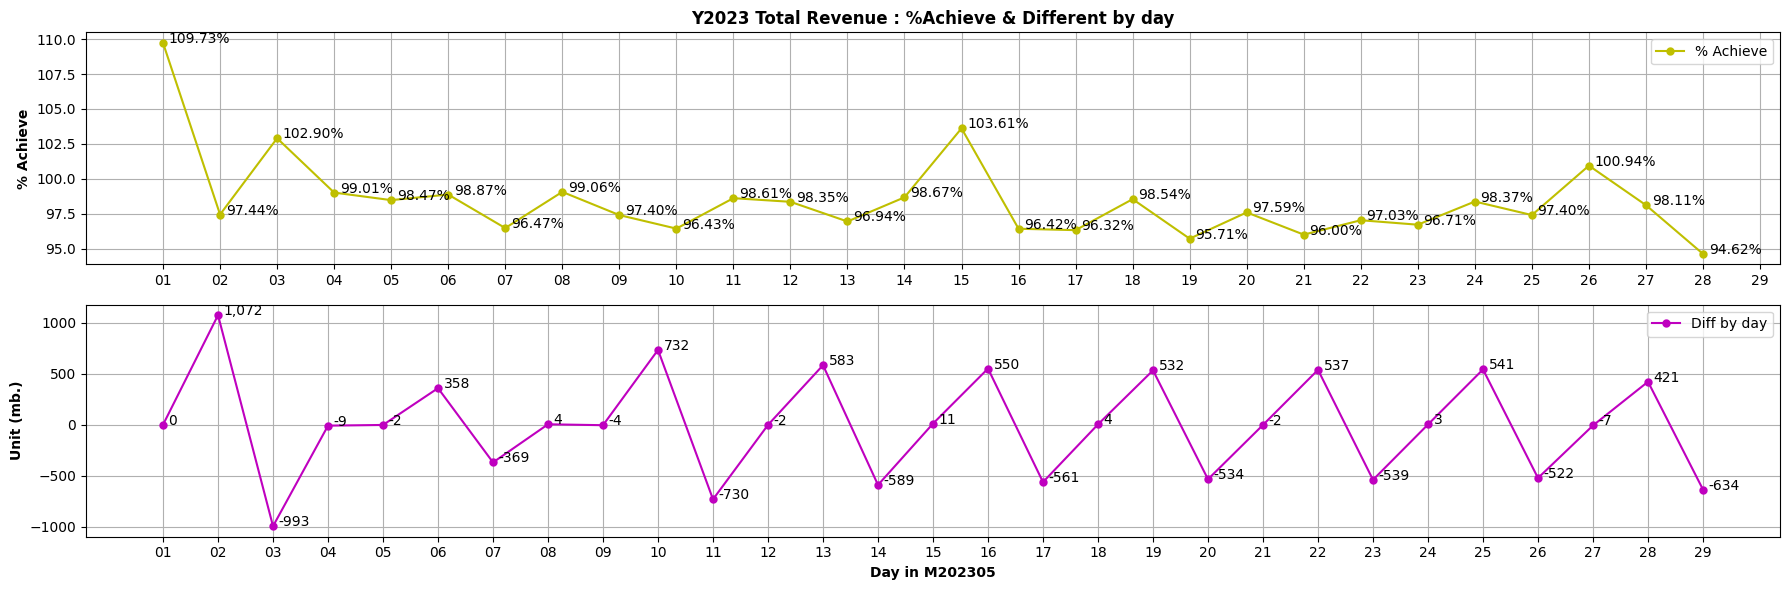

In [162]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i]+0.1, y_ach[i]))
plt.xticks(x_axis, x)
plt.title(f'Y{curr_yr} Total Revenue : %Achieve & Different by day', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by day', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i]+0.1, y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel(f'Day in M{curr_mth}', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()